# Feature Engineering & Prediction

## 0. Setup & Data Import

In [1]:
# import all the necessary libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [40]:
# load the train and test data
# !! use a relative path so that we don't need to change it each time we run on a different computer

# load the training data
train_path = '../data/train.csv'
train_data = pd.read_csv(train_path)

# load the testing data
test_path = '../data/test-full.csv'
test_data = pd.read_csv(test_path)

In [41]:
# quickly visualise the datasets
print(train_data.shape)
print(test_data.shape)


(15120, 56)
(581012, 55)


In [42]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1


In [43]:
test_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


## 1.1. Feature Engineering

implemented so far (!!keep adding if you do stuff)

**Feature engineering**
- Adding ELU data
- Removing Outliers
- Soil Types
- Climate Zones
- Linear Distance
- Euclidian Distance
- Other


**Feature Selection**
- PCA
- 4 different classifier rankings
- Correlation rankings


### Removing Outliers

In [6]:
# Find the outliers

from numpy import percentile
import itertools
def findCutOff(feature):
    #print(feature.index[feature>20])
    q25, q75 = percentile(feature, 25), percentile(feature, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 3
    lower, upper = q25 - cut_off, q75 + cut_off
    #return lower, upper
    return feature.index[(feature<lower)|(feature>upper)].tolist()


all_outliers=[]

#outliers
slope= train_data.groupby('Cover_Type')['Slope'].agg(findCutOff)
merged_slope = list(itertools.chain.from_iterable(slope))
all_outliers.append(merged_slope)

#Vertical_Distance_To_Hydrology
vh=train_data.groupby('Cover_Type')['Vertical_Distance_To_Hydrology'].agg(findCutOff)
merged_vh = list(itertools.chain.from_iterable(vh))
all_outliers.append(merged_vh)

#Horizontal_Distance_To_Hydrology
hh=(train_data.groupby('Cover_Type')['Horizontal_Distance_To_Hydrology'].agg(findCutOff))
merged_hh = list(itertools.chain.from_iterable(hh))
all_outliers.append(merged_hh)

#Horizontal_Distance_To_Roadways
hr=(train_data.groupby('Cover_Type')['Horizontal_Distance_To_Roadways'].agg(findCutOff))
merged_hr = list(itertools.chain.from_iterable(hr))
all_outliers.append(merged_hr)

#Horizontal_Distance_To_Fire_Points
hf=train_data.groupby('Cover_Type')['Horizontal_Distance_To_Fire_Points'].agg(findCutOff)
merged_hf = list(itertools.chain.from_iterable(hf))
all_outliers.append(merged_hf)

#Hillshade_9am
h9=(train_data.groupby('Cover_Type')['Hillshade_9am'].agg(findCutOff))
merged_h9 = list(itertools.chain.from_iterable(h9))
all_outliers.append(merged_h9)

#Hillshade_Noon
hn=(train_data.groupby('Cover_Type')['Hillshade_Noon'].agg(findCutOff))
merged_hn = list(itertools.chain.from_iterable(hn))
all_outliers.append(merged_hn)

#Hillshade_Noon
h3=(train_data.groupby('Cover_Type')['Hillshade_3pm'].agg(findCutOff))
merged_h3 = list(itertools.chain.from_iterable(h3))
all_outliers.append(merged_h3)
all_outliers = list(itertools.chain.from_iterable(all_outliers))
print("Total number of outliers: ",len(all_outliers))
print("Total number of outliers by cover type: ")
unique_index=np.unique(all_outliers)

train_data.loc[unique_index,:].Cover_Type.value_counts()

Total number of outliers:  152
Total number of outliers by cover type: 


Cover_Type
5    69
1    34
2    33
7     8
6     1
Name: count, dtype: int64

In [7]:
# remove the outliers
train_data.drop(unique_index,axis='rows',inplace=True)
test_data.drop(unique_index,axis='rows',inplace=True)

### Adding ELU Codes, Climate Zones, Geologic Zones

In [44]:

# Define the mapping for soil types to categories based on ELU descriptions
def soil_type_to_category(soil_type):
    stony_soil_types = {1, 2, 6, 9, 12, 18, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40}
    rubbly_soil_types = {3, 4, 5, 10, 11, 13}
    
    if soil_type in stony_soil_types:
        return "Stony"
    elif soil_type in rubbly_soil_types:
        return "Rubbly"
    else:
        return "Other"

# Define soil type to ELU code mapping function
def soil_type_to_elu_code(soil_type):
    soil_to_elu_map = {
        1: "2702", 2: "2703", 3: "2704", 4: "2705", 5: "2706",
        6: "2717", 7: "3501", 8: "3502", 9: "4201", 10: "4703",
        11: "4704", 12: "4744", 13: "4758", 14: "5101", 15: "5151",
        16: "6101", 17: "6102", 18: "6731", 19: "7101", 20: "7102",
        21: "7103", 22: "7201", 23: "7202", 24: "7700", 25: "7701",
        26: "7702", 27: "7709", 28: "7710", 29: "7745", 30: "7746",
        31: "7755", 32: "7756", 33: "7757", 34: "7790", 35: "8703",
        36: "8707", 37: "8708", 38: "8771", 39: "8772", 40: "8776"
    }
    return soil_to_elu_map.get(soil_type, "0000")

# Mapping for the first digit to climatic zones
climatic_zone_map = {
    1: 'lower montane dry',
    2: 'lower montane',
    3: 'montane dry',
    4: 'montane',
    5: 'montane dry and montane',
    6: 'montane and subalpine',
    7: 'subalpine',
    8: 'alpine'
}

# Mapping for the second digit to geologic zones
geologic_zone_map = {
    1: 'alluvium',
    2: 'glacial',
    3: 'shale',
    4: 'sandstone',
    5: 'mixed sedimentary',
    6: 'unspecified',
    7: 'igneous and metamorphic',
    8: 'volcanic'
}

# Identify the soil type columns
soil_columns = [f"Soil_Type{i}" for i in range(1, 41)]

# Function to find the active soil type and return the corresponding category
def find_soil_type_and_return_category(row):
    for i, col in enumerate(soil_columns, start=1):
        if row[col] == 1:
            return soil_type_to_category(i)
    return "Other"

# Function to find the active soil type and return the corresponding ELU code
def find_soil_type_and_return_elu(row):
    for i, col in enumerate(soil_columns, start=1):
        if row[col] == 1:
            return soil_type_to_elu_code(i)
    return "0000"



In [45]:
# Apply the functions to train
train_data['Category'] = train_data.apply(find_soil_type_and_return_category, axis=1)
train_data['ELU_Code'] = train_data.apply(find_soil_type_and_return_elu, axis=1)
train_data['Climatic_Zone'] = train_data['ELU_Code'].apply(lambda x: climatic_zone_map[int(str(x)[0])])
train_data['Geologic_Zone'] = train_data['ELU_Code'].apply(lambda x: geologic_zone_map[int(str(x)[1])])

# One-hot encode the 'Category', 'Climatic_Zone', and 'Geologic_Zone'
category_dummies = pd.get_dummies(train_data['Category'], prefix='Category')
climatic_zone_dummies = pd.get_dummies(train_data['Climatic_Zone'], prefix='Climatic')
geologic_zone_dummies = pd.get_dummies(train_data['Geologic_Zone'], prefix='Geologic')

# Join the one-hot encoded columns back with the original data
train_data = train_data.join([category_dummies, climatic_zone_dummies, geologic_zone_dummies])

# Drop the original columns to avoid duplication
train_data.drop(['Category', 'Climatic_Zone', 'Geologic_Zone'], axis=1, inplace=True)

In [46]:
# Apply the functions to test_data
test_data['Category'] = test_data.apply(find_soil_type_and_return_category, axis=1)
test_data['ELU_Code'] = test_data.apply(find_soil_type_and_return_elu, axis=1)
test_data['Climatic_Zone'] = test_data['ELU_Code'].apply(lambda x: climatic_zone_map[int(str(x)[0])])
test_data['Geologic_Zone'] = test_data['ELU_Code'].apply(lambda x: geologic_zone_map[int(str(x)[1])])

# One-hot encode the 'Category', 'Climatic_Zone', and 'Geologic_Zone'
category_dummies = pd.get_dummies(test_data['Category'], prefix='Category')
climatic_zone_dummies = pd.get_dummies(test_data['Climatic_Zone'], prefix='Climatic')
geologic_zone_dummies = pd.get_dummies(test_data['Geologic_Zone'], prefix='Geologic')

# Join the one-hot encoded columns back with the original data
test_data = test_data.join([category_dummies, climatic_zone_dummies, geologic_zone_dummies])

# Drop the original columns to avoid duplication
test_data.drop(['Category', 'Climatic_Zone', 'Geologic_Zone'], axis=1, inplace=True)

# Now let's see the first few rows to confirm the changes in test_data
print(test_data.head())

   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Climatic_lower montane  \
0            221             232            148  ...                   False   
1   

In [47]:
print(train_data.shape)
print(test_data.shape)

(15120, 71)
(581012, 70)


### Separate last two digits of ELU

In [48]:
# Extract the third digit of the ELU code and create a new column
train_data['ELU3'] = train_data['ELU_Code'].apply(lambda x: int(str(x)[2]) if len(str(x)) > 2 else 0)

# Extract the fourth digit of the ELU code and create a new column
train_data['ELU4'] = train_data['ELU_Code'].apply(lambda x: int(str(x)[3]) if len(str(x)) > 3 else 0)

# Display the first few rows to verify the new columns
print(train_data[['ELU_Code', 'ELU3', 'ELU4']].head())


  ELU_Code  ELU3  ELU4
0     7746     4     6
1     7700     0     0
2     7745     4     5
3     7202     0     2
4     7700     0     0


In [49]:
# Apply the same extraction for the third and fourth digits of the ELU code
test_data['ELU3'] = test_data['ELU_Code'].apply(lambda x: int(str(x)[2]) if len(str(x)) > 2 else 0)
test_data['ELU4'] = test_data['ELU_Code'].apply(lambda x: int(str(x)[3]) if len(str(x)) > 3 else 0)

# Verify the new columns in test_data
print(test_data[['ELU_Code', 'ELU3', 'ELU4']].head())

  ELU_Code  ELU3  ELU4
0     7745     4     5
1     7745     4     5
2     4744     4     4
3     7746     4     6
4     7745     4     5


In [50]:
print(train_data.shape)
print(test_data.shape)

(15120, 73)
(581012, 72)


### Linear Distance

In [51]:
def linear_dist(X: pd.DataFrame, drop_original: bool = False) -> pd.DataFrame:
    """
    This function calculates linear combinations of distances to hydrology,
    fire points, and roadways, including:
        - hydrology + fire points
        - |hydrology - fire points|
        - hydrology + roadways
        - |hydrology - roadways|
        - fire points + roadways
        - |fire points - roadways|
        
    The 'Id' column is preserved and reattached if present.
    
    Parameters:
    - X: pd.DataFrame - The input DataFrame containing distance columns and optionally an 'Id' column.
    - drop_original: bool - Indicates whether to drop the original distance columns after calculating the combinations.
    
    Returns:
    - pd.DataFrame - The DataFrame with added linear combination columns and optionally without the original distance columns.
    """
    X = X.copy()  # Work on a copy of the input DataFrame to avoid changing the original
    
    # Store the 'Id' column if it exists, then remove it temporarily
    if 'Id' in X.columns:
        Id_col = X['Id'].copy()
        X.drop(columns=['Id'], inplace=True)
    else:
        Id_col = None

    # List of distance columns to combine
    cols = [
        "Horizontal_Distance_To_Hydrology",
        "Horizontal_Distance_To_Fire_Points",
        "Horizontal_Distance_To_Roadways",
    ]

    # Linear Combination of distances
    X["Hyd_p_Fire"] = X[cols[0]] + X[cols[1]]
    X["Hyd_m_Fire"] = abs(X[cols[0]] - X[cols[1]])
    X["Hyd_p_Road"] = X[cols[0]] + X[cols[2]]
    X["Hyd_m_Road"] = abs(X[cols[0]] - X[cols[2]])
    X["Fire_p_Road"] = X[cols[1]] + X[cols[2]]
    X["Fire_m_Road"] = abs(X[cols[1]] - X[cols[2]])

    # Drop the original distance columns if specified
    if drop_original:
        X.drop(columns=cols, inplace=True)

    # Reattach the 'Id' column if it was present
    if Id_col is not None:
        X = pd.concat([Id_col, X], axis=1)

    return X


### Euclidian Distance

In [52]:
# Calculate new features based on mean distances
# train
train_data['Mean_Elevation_Vertical_Distance_Hydrology'] = (train_data['Elevation'] + train_data['Vertical_Distance_To_Hydrology']) / 2
train_data['Mean_Distance_Hydrology_Firepoints'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Fire_Points']) / 2
train_data['Mean_Distance_Hydrology_Roadways'] = (train_data['Horizontal_Distance_To_Hydrology'] + train_data['Horizontal_Distance_To_Roadways']) / 2
train_data['Mean_Distance_Firepoints_Roadways'] = (train_data['Horizontal_Distance_To_Fire_Points'] + train_data['Horizontal_Distance_To_Roadways']) / 2

print(f"Shape of train after adding new features: {train_data.shape}")

# test
test_data['Mean_Elevation_Vertical_Distance_Hydrology'] = (test_data['Elevation'] + test_data['Vertical_Distance_To_Hydrology']) / 2
test_data['Mean_Distance_Hydrology_Firepoints'] = (test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Fire_Points']) / 2
test_data['Mean_Distance_Hydrology_Roadways'] = (test_data['Horizontal_Distance_To_Hydrology'] + test_data['Horizontal_Distance_To_Roadways']) / 2
test_data['Mean_Distance_Firepoints_Roadways'] = (test_data['Horizontal_Distance_To_Fire_Points'] + test_data['Horizontal_Distance_To_Roadways']) / 2

print(f"Shape of test after adding new features: {test_data.shape}")


Shape of train after adding new features: (15120, 77)
Shape of test after adding new features: (581012, 76)


### Other columns

In [11]:
# engineering new columns from our df
def other_FE(X):
    
    X['Aspect'] = X['Aspect'] % 360
    X['Aspect_120'] = (X['Aspect'] + 120) % 360

    X['Hydro_Elevation_sum'] = X['Elevation'] + X['Vertical_Distance_To_Hydrology']
                                 
    X['Hydro_Elevation_diff'] = abs(X['Elevation'] - X['Vertical_Distance_To_Hydrology'])

    X['Hydro_Euclidean'] = np.sqrt(X['Horizontal_Distance_To_Hydrology']**2 +
                                   X['Vertical_Distance_To_Hydrology']**2)

    X['Hydro_Manhattan'] = abs(X['Horizontal_Distance_To_Hydrology'] +
                            X['Vertical_Distance_To_Hydrology'])
    
    X['Hydro_Distance_sum'] = X['Horizontal_Distance_To_Hydrology'] + X['Vertical_Distance_To_Hydrology']
                                
    X['Hydro_Distance_diff'] = abs(X['Horizontal_Distance_To_Hydrology'] - X['Vertical_Distance_To_Hydrology'])
    
    X['Hydro_Fire_sum'] = X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Fire_Points']
                            
    X['Hydro_Fire_diff'] = abs(X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Fire_Points'])

    X['Hydro_Fire_mean'] = (X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Fire_Points'])/2
                               
    X['Hydro_Road_sum'] = X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways']
                            
    X['Hydro_Road_diff'] = abs(X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'])

    X['Hydro_Road_mean'] = (X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'])/2
    
    X['Road_Fire_sum'] = X['Horizontal_Distance_To_Roadways'] + X['Horizontal_Distance_To_Fire_Points']
                           
    X['Road_Fire_diff'] = abs(X['Horizontal_Distance_To_Roadways'] - X['Horizontal_Distance_To_Fire_Points'])

    X['Road_Fire_mean'] = (X['Horizontal_Distance_To_Roadways'] + X['Horizontal_Distance_To_Fire_Points'])/2
    
    X['Hydro_Road_Fire_mean'] = (X['Horizontal_Distance_To_Hydrology'] + X['Horizontal_Distance_To_Roadways'] + 
                                  X['Horizontal_Distance_To_Fire_Points'])/3

    
    return X

### Apply functions

In [53]:
# linear distance fct
train_data = linear_dist(train_data)
test_data = linear_dist(test_data)

# other FE
train_data = other_FE(train_data)
test_data = other_FE(test_data)


In [54]:
# train data post-feature engineering -> make sure it still contains 'Id'
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Hydrology_Firepoints,Mean_Distance_Hydrology_Roadways,Mean_Distance_Firepoints_Roadways,Hyd_p_Fire,Hyd_m_Fire,Hyd_p_Road,Hyd_m_Road,Fire_p_Road,Fire_m_Road
0,242642,2881,130,22,210,54,1020,250,221,88,...,1467.5,276.0,615.0,681.0,552,132,1230,810,1362,678
1,309891,3005,351,14,242,-16,1371,194,215,159,...,1494.5,542.0,806.5,1106.5,1084,600,1613,1129,2213,529
2,287847,3226,63,14,618,2,1092,232,210,107,...,1614.0,1318.0,855.0,1555.0,2636,1400,1710,474,3110,926
3,516307,3298,317,8,661,60,752,198,233,174,...,1679.0,954.5,706.5,1000.0,1909,587,1413,91,2000,496
4,124860,3080,35,6,175,26,3705,219,227,144,...,1553.0,1424.0,1940.0,3189.0,2848,2498,3880,3530,6378,1032


In [55]:
train_data.shape

(15120, 83)

In [56]:
test_data.shape

(581012, 82)

## 1.2. Feature Selection

Now that we have determined how to change our features or add new meaningful features, we select the most important ones to keep for our prediction. There are several options to select our features, including:
- PCA
- Using classifiers from sklearn.ensemble Library to rank the features by meaningfulness
- Removing the ones with lowest correlation to Cover Type

These methods lead to slightly rankings, however the most important features accross methods are consistent across methods.

### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = train_data['Cover_Type'] 
X = train_data.drop('Cover_Type', axis=1) 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
pca = PCA(n_components=20) 
X_pca = pca.fit_transform(X_scaled)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

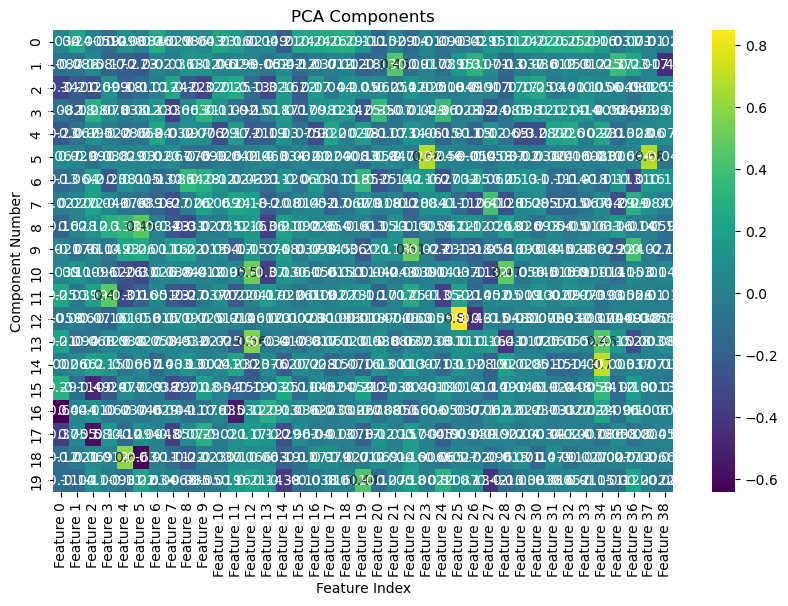

In [ ]:
components_df = pd.DataFrame(pca.components_, columns=[f'Feature {i}' for i in range(X_scaled.shape[1])])

plt.figure(figsize=(10, 6))
sns.heatmap(components_df, cmap='viridis', annot=True)
plt.title('PCA Components')
plt.ylabel('Component Number')
plt.xlabel('Feature Index')
plt.show()


The main drawback is that PCA is not very interpretable, so we look at various classifier rankings next.

### Classifier Rankings

Random Forest Classifier

In [57]:
X = train_data.drop(['Id', 'Cover_Type'], axis=1) 
y = train_data['Cover_Type']

# train random forest
RFC_model = RandomForestClassifier(random_state=0, n_jobs=-1)
RFC_model.fit(X, y)

# Extract feature importance
importances = RFC_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Get feature names and their importances
rfc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
rfci_list = [importances[indices[f]] for f in range(X.shape[1])]

ranking_rfc = pd.DataFrame({
    'RFC': rfc_list,
    'RFC Importance': rfci_list
})

ranking_rfc.head(10)


,RFC,RFC Importance
0,Elevation,0.120075
1,Mean_Elevation_Vertical_Distance_Hydrology,0.092881
2,ELU_Code,0.046943
3,Fire_p_Road,0.037209
4,Mean_Distance_Firepoints_Roadways,0.035429
5,Horizontal_Distance_To_Roadways,0.035134
6,Hyd_m_Road,0.033510
7,Horizontal_Distance_To_Hydrology,0.032674
8,Wilderness_Area4,0.031317
9,Hyd_p_Road,0.030252


Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(random_state=0, n_jobs=-1)
ETC_model.fit(X, y)

importances = ETC_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Get feature names and their importances
etc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
etci_list = [importances[indices[f]] for f in range(X.shape[1])]

ranking_etc = pd.DataFrame({
    'ETC': etc_list,
    'ETC Importance': etci_list
})

ranking_etc.head(10)


,ETC,ETC Importance
0,Elevation,0.085325
1,Mean_Elevation_Vertical_Distance_Hydrology,0.062357
2,Climatic_alpine,0.037987
3,Wilderness_Area4,0.037553
4,ELU_Code,0.037380
5,Mean_Distance_Firepoints_Roadways,0.032938
6,Hyd_m_Road,0.032617
7,Fire_p_Road,0.031843
8,Hyd_p_Road,0.029847
9,Horizontal_Distance_To_Roadways,0.029653


Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state=0)
GBC_model.fit(X, y)

# Extract Feature Importance
importances = GBC_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Get feature names and their importances
gbc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
gbci_list = [importances[indices[f]] for f in range(X.shape[1])]

ranking_gbc = pd.DataFrame({
    'GBC': gbc_list,
    'GBC Importance': gbci_list
})

ranking_gbc.head(10)


,GBC,GBC Importance
0,Elevation,0.405957
1,ELU_Code,0.106980
2,Soil_Type10,0.057115
3,Climatic_subalpine,0.042353
4,Hillshade_9am,0.040256
5,Horizontal_Distance_To_Hydrology,0.028050
6,Hyd_m_Road,0.027259
7,Soil_Type30,0.026519
8,Climatic_alpine,0.025435
9,Fire_m_Road,0.024047


AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier

ABC_model = AdaBoostClassifier(random_state=0)
ABC_model.fit(X, y)

# extract feature importance
importances = ABC_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort by importance

# Get feature names and their importances
abc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
abci_list = [importances[indices[f]] for f in range(X.shape[1])]

ranking_ada = pd.DataFrame({
    'ABC': abc_list,
    'ABC Importance': abci_list
})

ranking_ada.head(10)

,ABC,ABC Importance
0,Wilderness_Area4,0.48
1,Mean_Elevation_Vertical_Distance_Hydrology,0.46
2,Elevation,0.06
3,Soil_Type16,0.00
4,Soil_Type9,0.00
5,Soil_Type10,0.00
6,Soil_Type11,0.00
7,Soil_Type12,0.00
8,Soil_Type13,0.00
9,Soil_Type14,0.00


### Correlation coefficients

In [61]:
correlation_matrix = train_data.corr()  # Compute the correlation matrix

# Calculate the correlation of each feature with 'Cover_Type'
feature_correlation = correlation_matrix['Cover_Type'].drop(['Cover_Type', 'Id'])  # Exclude self-correlation and Id
ranking_corr = feature_correlation.abs().sort_values(ascending=False)

# Print the ranking of features based on their absolute correlation with 'Cover_Type'
print("Ranking of features by absolute correlation with 'Cover_Type':")
print(ranking_corr)

# Decide on a threshold for low correlation and identify low correlation features
low_correlation_features = ranking_corr[ranking_corr < 0.05].index.tolist()

print("\nFeatures with low correlation (absolute value < 0.05):")
print(low_correlation_features)

Ranking of features by absolute correlation with 'Cover_Type':
Climatic_alpine           0.436913
Climatic_subalpine        0.409168
Soil_Type38               0.254248
Geologic_glacial          0.237106
Soil_Type39               0.234777
                            ...   
Climatic_lower montane    0.004088
Category_Stony            0.002978
Soil_Type26               0.002939
Soil_Type34               0.002877
Soil_Type15                    NaN
Name: Cover_Type, Length: 81, dtype: float64

Features with low correlation (absolute value < 0.05):
['Soil_Type19', 'Climatic_montane and subalpine', 'Hillshade_3pm', 'Soil_Type17', 'Soil_Type20', 'Soil_Type5', 'Soil_Type21', 'ELU_Code', 'Soil_Type13', 'Soil_Type4', 'Soil_Type14', 'Climatic_montane dry and montane', 'Wilderness_Area2', 'Mean_Elevation_Vertical_Distance_Hydrology', 'Soil_Type25', 'Soil_Type36', 'Soil_Type27', 'Geologic_alluvium', 'Soil_Type3', 'Geologic_mixed sedimentary', 'Climatic_montane dry', 'Soil_Type9', 'Soil_Type1', 'Soil

### Features to keep

Chose only one of the options below!

Option 1: Handpick features

In [ ]:
hp_features = ['Elevation', 
               'Wilderness_Area4', 
               'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 
               'Soil_Type2','Soil_Type4', 'Soil_Type10', 'Soil_Type22', 'Soil_Type23', 'Soil_Type39',
               'Fire_p_Road', 'Hyd_m_Road', 'Hyd_p_Road',
                'Mean_Distance_Firepoints_Roadways', 'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Hydrology_Roadways',
                'Clim6', 'Clim7', 'Clim8']


train_features = hp_features + ['Cover_Type'] + ['Id']
test_features = hp_features + ['Id']

train = train_data[train_features]
test = test_data[test_features]


Option 2:  combine all the rankings created above and select the features that appear in at least one of the rankings' top 10 features.

-> Better score with option 2 

In [ ]:
# Keep the top 10 of each ranking/method
top10_rf = set(ranking_rfc['RFC'].head(10))
top10_et = set(ranking_etc['ETC'].head(10))
top10_gb = set(ranking_gbc['GBC'].head(10))
top10_ab = set(ranking_ada['ABC'].head(10))
top10_corr = ranking_corr.head(10).index.tolist()

# Combine the sets to get unique features from the top 10 of any classifier
unique_top_features = top10_rf.union(top10_et).union(top10_gb).union(top10_ab).union(top10_corr)
unique_top_features

{'Clim4',
 'Clim7',
 'Clim8',
 'ELU1',
 'ELU2',
 'ELU3',
 'ELU4',
 'Elevation',
 'Fire_m_Road',
 'Fire_p_Road',
 'Geo2',
 'Geo4',
 'Hillshade_9am',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hyd_m_Road',
 'Mean_Distance_Firepoints_Roadways',
 'Mean_Distance_Hydrology_Roadways',
 'Mean_Elevation_Vertical_Distance_Hydrology',
 'Soil_Other',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4'}

In [ ]:
unique_top_features_list = list(unique_top_features)

train_features = unique_top_features_list + ['Cover_Type'] + ['Id']
test_features = unique_top_features_list + ['Id']

train = train_data[train_features]
test = test_data[test_features]

# 2. Prediction

++ for our report: create a fct where we can compare all of our scores (e.g. creates a matrix with all the different scores)

In [62]:
train = train_data
test = test_data

In [63]:
# check what the train and test shapes looks like with feature engineering implemented
# train should have one more column (the Cover_Type) compared to test
print(train.shape) 
print(test.shape)


(15120, 83)
(581012, 82)


### Train the model(s)

Split the datasets for validation

In [64]:
# Prepare the data for the prediction
X = train.drop(['Id', 'Cover_Type'], axis=1)
y = train['Cover_Type']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Classifier

In [65]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=17)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.8878968253968254


Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=17)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_gb = gb_model.predict(X_val)

# Evaluate the model
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gb}')


Gradient Boosting Classifier Accuracy: 0.8161375661375662


KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier(weights='distance', n_jobs=-1, n_neighbors=2)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f'K-Nearest Neighbors Classifier Accuracy: {accuracy_knn}')


K-Nearest Neighbors Classifier Accuracy: 0.8227513227513228


XGBoost

In [28]:
# XGboost uses a special indexing, which is why we do the prediction and CSV output here directly for this method.

# adjust indexing
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=5, use_label_encoder=False, eval_metric='logloss')

# Train the model using the adjusted labels
xgb_model.fit(X_train, y_train_adjusted)

# Predict on the validation set using the adjusted labels
y_pred_xgb = xgb_model.predict(X_val)

# Since predictions will also be in the adjusted label space, you need to add 1 back to align with the original labeling
y_pred_xgb_original_labels = y_pred_xgb + 1

# Evaluate the model
accuracy_xgb = accuracy_score(y_val_adjusted, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb}')

# Prepare the test data by removing the 'Id' column
X_test = test.drop(['Id'], axis=1) 

# Predict on the test data using the XGBoost model
test_predictions_adjusted = xgb_model.predict(X_test)

# Adjust the predictions back to the original label range for submission
test_predictions = test_predictions_adjusted + 1

# Create a DataFrame with 'Id' and 'Cover_Type' columns
prediction_df = pd.DataFrame({
    'Id': test['Id'],  
    'Cover_Type': test_predictions
})

# Save the DataFrame to a CSV file for submission
prediction_filename = 'XGBoost_predictions.csv'
prediction_df.to_csv(prediction_filename, index=False)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:ELU_Code: object

SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate the model
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f'Support Vector Machine Classifier Accuracy: {accuracy_svm}')


Support Vector Machine Classifier Accuracy: 0.6144179894179894


CastBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


# Initialize the CatBoost Classifier 
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_catboost = catboost_model.predict(X_val)

#Evaluate the model
accuracy_catboost = accuracy_score(y_val, y_pred_catboost)
print(f'CatBoost Classifier Accuracy: {accuracy_catboost}')


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/elisebarattini/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v1/r1j96n7d1w57mz0vtk4q7msr0000gn/T/ipykernel_15149/3257954996.py", line 9, in <module>
    catboost_model.fit(X_train, y_train)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/catboost/core.py", line 2339, in _fit
    train_params = self._prepare_train_params(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/catboost/core.py", line 2220, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_fe

ExtraTreesClassifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


# Initialize the ExtraTrees Classifier
extratrees_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Train the model
extratrees_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_extratrees = extratrees_model.predict(X_val)

# Evaluate the model
accuracy_extratrees = accuracy_score(y_val, y_pred_extratrees)
print(f'ExtraTrees Classifier Accuracy: {accuracy_extratrees}')


ExtraTrees Classifier Accuracy: 0.8938492063492064


 DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
decisiontree_model = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train the model
decisiontree_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_decisiontree = decisiontree_model.predict(X_val)

# Evaluate the model
accuracy_decisiontree = accuracy_score(y_val, y_pred_decisiontree)
print(f'Decision Tree Classifier Accuracy: {accuracy_decisiontree}')


Decision Tree Classifier Accuracy: 0.6233465608465608


### Create the CSV file

Your submission should be a CSV file with 581012 rows and a header. 

In [69]:
# Prepare the test data by removing the 'Id' column
X_test = test.drop(['Id'], axis=1)

# Predict on the test data
# !! change the model name according to what you are using
test_predictions = extratrees_model.predict(X_test)

test_predictions_1d = test_predictions.flatten()

# Create a DataFrame with 'Id' and 'Cover_Type' columns
prediction_df = pd.DataFrame({
    'Id': test['Id'],
    'Cover_Type': test_predictions_1d
})

# Save the DataFrame to a CSV file
prediction_filename = 'predictions.csv'
prediction_df.to_csv(prediction_filename, index=False)

In [ ]:
# run this for debugging: it should output (581012, 2). Otherwise the format is wrong.
prediction_df.shape


(581012, 2)

## Scorekeeping

To keep track of our Kaggle scores, every time you submit a new csv to kaggle, add the score + a short description of what we changed/added

Use Format: Score obtained on kaggle / Feature Engineering Steps Used / Model Used
!! keep in order of biggest to smallest scores

**Random Forest**
- 0.75 / Euclidian Dist + Keeping union of top 10 most meaningful values / Random Forest
- 0.74 / Euclidian Dist + Keeping intersection of top 20 most meaningful values / Random Forest
- 0.73 / Euclidian Dist + Keeping union of top 5 most meaningful values / Random Forest
- 0.68 / Euclidian Dist, Low Corr(0.05), Merge Soil Types / Random Forest
- 0.50 / Interaction Fct, Aggregate Fct, Euclidian Dist, Low Corr(0.05), Merge Soil Types / Random Forest


**Gradient Boosting Classifier**
- 0.65 / Euclidian Dist, Low Corr(0.02) / GBC
- 0.56 / Euclidian Dist, Low Corr(0.05), Merge Soil Types / GBC
- 0.55 / Euclidian Dist, Low Corr(0.05) / GBC

**KNN**
- 0.65 / Euclidian Dist + Keeping intersection of top 20 most meaningful values / KNN w 2 neighors

-**XGBoost**
- 0.74 / Euclidian Dist
- 0.73 / no Feature Eng



# 3. Hyperparameter Tuning

In [ ]:
# ++ to do for the best 2-3 models

# Extra Trees Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Define the hyperparameter grid to search
hyperparameter_grid = {
    'n_estimators': [50, 100, 300, 500, 1000],
    'min_samples_split': [2, 3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the model
extra_trees_model = ExtraTreesClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_cv_extra_trees = RandomizedSearchCV(
    estimator=extra_trees_model,
    param_distributions=hyperparameter_grid,
    cv=5, n_iter=20,
    scoring='accuracy',
    n_jobs=-1, verbose=1,
    return_train_score=True,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
# Make sure to replace `X` and `y` with your actual training data
random_cv_extra_trees.fit(X, y)

# Best hyperparameter configuration
print("Best Extra Trees configuration:", random_cv_extra_trees.best_params_)

# Best accuracy score
print("Best Extra Trees accuracy score:", random_cv_extra_trees.best_score_)


# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for RandomForest
hyperparameter_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
random_forest_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV for Random Forest
random_cv_rf = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=hyperparameter_grid_rf,
    cv=5, n_iter=20,
    scoring='accuracy',
    n_jobs=-1, verbose=1,
    return_train_score=True,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_cv_rf.fit(X, y)

# Best hyperparameter configuration for Random Forest
print("Best Random Forest configuration:", random_cv_rf.best_params_)

# Best accuracy score for Random Forest
print("Best Random Forest accuracy score:", random_cv_rf.best_score_)


# 4. Archives

Drag code here that might be useful later but that currently does not work/ cannot be used

**Outliers**

In [ ]:

def detect_outliers(df, n, features):
   
    outlier_indices = []

    for col in features:
       
        Q1 = df[col].quantile(0.25)
        
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = pd.Series(outlier_indices).value_counts()
    multiple_outliers = outlier_indices[outlier_indices > n].index

    return multiple_outliers


numeric_features = [
    'Elevation', 
    'Aspect', 
    'Slope', 
    'Horizontal_Distance_To_Hydrology', 
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 
    'Hillshade_Noon', 
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

outliers_to_remove = detect_outliers(train_data, 2, numeric_features)

In [ ]:
## gives very bad accuracy scores (around 0.3) for all the algos, so sth is wrong

# test model


from ast import literal_eval
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score



def evaluate_models(X, y):
    models = {
        "LogReg": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "DT": DecisionTreeClassifier(),
        "RF": RandomForestClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "XGB": XGBClassifier(),
        "Catboost": CatBoostClassifier(verbose=0),
        #"LightGBM": LGBMClassifier(),
    }
    
    results = {}
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') 
        results[name] = scores
        print(f"{name}: Accuracy = {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    
    return results

### Merging Soil Types

not sure it makes sense to keep this one

In [ ]:
# Extract soil type columns
soil_columns = [col for col in train.columns if col.startswith('Soil_Type')]

# Combine the soil type columns into a single feature by identifying the active soil type
# train
train['Soil_Type_Combined'] = train[soil_columns].idxmax(axis=1).str.extract('(\d+)').astype(int)
train = train.drop(soil_columns, axis=1)

# test
test['Soil_Type_Combined'] = test[soil_columns].idxmax(axis=1).str.extract('(\d+)').astype(int)
test = test.drop(soil_columns, axis=1)


### Aggregate Features

In [ ]:
def create_aggregate_features(df):
    """
    Create aggregate features that summarize information across multiple features.

    Args:
        df (pd.DataFrame): DataFrame to enhance with aggregate features.

    Returns:
        pd.DataFrame: DataFrame with new aggregate features.
    """
    # Example aggregate feature: Mean Hillshade
    df['Mean_Hillshade'] = df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].mean(axis=1)

    # More aggregates can be added based on exploratory data analysis and domain knowledge


    return df


### Interaction Features

In [ ]:
def create_interaction_features(df):
    """
    Create interaction features by combining existing features.

    Args:
        df (pd.DataFrame): DataFrame to enhance with interaction features.

    Returns:
        pd.DataFrame: DataFrame with new interaction features.
    """
    # Example interaction: Elevation and Hydrology features
    df['Elevation_plus_Vertical_Hydrology'] = df['Elevation'] + df['Vertical_Distance_To_Hydrology']
    df['Elevation_times_Horizontal_Hydrology'] = df['Elevation'] * df['Horizontal_Distance_To_Hydrology']

    # You can add more interactions based on domain knowledge and exploratory data analysis insights

    return df


### Polynomial Features

In [ ]:
# this fct does not seem to work when applied to train_data -> look into this
from sklearn.preprocessing import PolynomialFeatures

def add_polynomial_features(df, feature_cols, degree=2):
    """
    Adds polynomial features to the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame to enhance with polynomial features.
        feature_cols (list): List of column names to which polynomial features will be applied.
        degree (int): The degree of the polynomial features.

    Returns:
        pd.DataFrame: DataFrame with polynomial features added.
    """
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(df[feature_cols])
    poly_feature_names = poly.get_feature_names(feature_cols)
    df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    
    # Drop the original features to avoid multicollinearity
    df.drop(feature_cols, axis=1, inplace=True)
    
    # Concatenate the original DataFrame with the new polynomial features
    df = pd.concat([df, df_poly], axis=1)
    
    return df
